## Import SEG_SGEMM Data as int64

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_as_int64 = np.genfromtxt("./로그 데이터/SEG_SGEMM_result.txt", delimiter="\n", dtype=np.int64).reshape(-1, 1)
data_as_int64 = pd.DataFrame(data=data_as_int64, columns=["SEG"])
data_as_int64

,SEG
0,3196231680
1,93292771632
2,93293300344
3,93293373376
4,93292057424
...,...
237191,92622695528
237192,92622695520
237193,92658792872
237194,92658792864


## Import SEG_SGEMM Data as String (object)  
Since this is not regression problem, regard each of data as string, not numerics

In [4]:
original = pd.read_csv("./로그 데이터/SEG_SGEMM_result.txt")
original.columns = ["SEG"]
split_index = 200000
data = original.copy()
train_set = data[:split_index]
test_set = data[split_index:]
test_set.reset_index(drop=True, inplace=True)
train_set, test_set

(                SEG
 0       93292771632
 1       93293300344
 2       93293373376
 3       93292057424
 4       93292217584
 ...             ...
 199995  93230418624
 199996  93250149116
 199997  93249799072
 199998  93250795088
 199999  93294595904
 
 [200000 rows x 1 columns],
                SEG
 0      93250622624
 1      93294603856
 2      93294597824
 3      93239913184
 4      93250786592
 ...            ...
 37190  92622695528
 37191  92622695520
 37192  92658792872
 37193  92658792864
 37194  92654987192
 
 [37195 rows x 1 columns])

## Histogram of SEG using value_counts()
Since there are too many categories, unable to draw Histogram.

In [5]:
data_counts = train_set["SEG"].value_counts().to_frame("SEG_counts")
data_counts

,SEG_counts
92706114236,6690
92901442004,4592
93615631856,3748
93955937600,2385
92916149332,1476
...,...
93519025520,1
93407145416,1
92739621880,1
93232683680,1


## Number of counts over threshold  
True if number of count is greater than threshold_num_of_label, False otherwise.  
Interpretation : There are only 20 Categories that contain more than 100 data.  
Use threshold_num_of_label as Hyper-Parameter

In [6]:
threshold_num_of_label = 10
data_counts_over_threshold = (data_counts > threshold_num_of_label)["SEG_counts"]
data_counts_over_threshold.value_counts()

False    36627
True       926
Name: SEG_counts, dtype: int64

## Comparision of number of counts over threshold via iterating with mod 5.

In [7]:
for i in range(1, 20):
    print((data_counts > i*5)["SEG_counts"].value_counts())

False    22513
True     15040
Name: SEG_counts, dtype: int64
False    36627
True       926
Name: SEG_counts, dtype: int64
False    37207
True       346
Name: SEG_counts, dtype: int64
False    37449
True       104
Name: SEG_counts, dtype: int64
False    37498
True        55
Name: SEG_counts, dtype: int64
False    37511
True        42
Name: SEG_counts, dtype: int64
False    37516
True        37
Name: SEG_counts, dtype: int64
False    37517
True        36
Name: SEG_counts, dtype: int64
False    37517
True        36
Name: SEG_counts, dtype: int64
False    37517
True        36
Name: SEG_counts, dtype: int64
False    37517
True        36
Name: SEG_counts, dtype: int64
False    37517
True        36
Name: SEG_counts, dtype: int64
False    37520
True        33
Name: SEG_counts, dtype: int64
False    37520
True        33
Name: SEG_counts, dtype: int64
False    37521
True        32
Name: SEG_counts, dtype: int64
False    37523
True        30
Name: SEG_counts, dtype: int64
False    37523
True     

## Categories whose number of counts is over the threshold.

In [8]:
data_over_threshold = data_counts_over_threshold.index[data_counts_over_threshold == True]
data_over_threshold

Index(['92706114236', '92901442004', '93615631856', '93955937600',
       '92916149332', '93568880464', '93108860032', '93163522156',
       '93926004488', '92705899400',
       ...
       '93150433868', '93090177288', '93166125032', '93294895920',
       '93294891812', '93222394744', '93294774096', '93250713824',
       '93094706436', '93212622560'],
      dtype='object', length=926)

## Row indexes of data to be considered as "others"

In [9]:
train_set_mapped = train_set["SEG"].isin(data_over_threshold)
train_set_mapped_index = train_set_mapped.index[train_set_mapped == False]
train_set_mapped_index

Int64Index([     1,      3,      6,     11,     12,     13,     14,     15,
                16,     17,
            ...
            199990, 199991, 199992, 199993, 199994, 199995, 199996, 199997,
            199998, 199999],
           dtype='int64', length=161698)

## Represent data as "-1" (others)

In [10]:
train_set.loc[train_set_mapped_index] = "-1"
train_set["SEG"].value_counts()

-1             161698
92706114236      6690
92901442004      4592
93615631856      3748
93955937600      2385
                ...  
93231183954        11
93261327976        11
93702308056        11
93758066072        11
93535216528        11
Name: SEG, Length: 927, dtype: int64

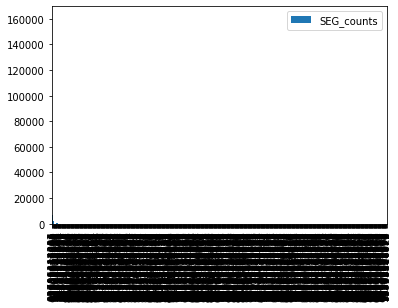

In [11]:
d = train_set["SEG"].value_counts().to_frame("SEG_counts")
d.plot(kind='bar')

In [12]:
from sklearn.preprocessing import OneHotEncoder
 
train_label_encoded, train_label_categories = train_label["SEG"].factorize()

encoder = OneHotEncoder()
encoded = encoder.fit_transform(train_label_encoded.reshape(-1, 1))
encoded.toarray().shape

NameError: name 'train_label' is not defined

In [13]:
import tensorflow as tf
from tensorflow import keras

def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

    if single_step:
        labels.append(target[i+target_size])
    else:
        labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

TRAIN_SPLIT = 18000
past_history = 10
future_target = 10
STEP = 1

#x_train, y_train = multivariate_data(train_set.values, train_label.values, 0, TRAIN_SPLIT, past_history, future_target, STEP, single_step=True)
#x_val, y_val = multivariate_data(train_set.values, train_label.values, TRAIN_SPLIT, None, past_history, future_target, STEP, single_step=True)

In [14]:
x_train = train_set[:TRAIN_SPLIT].values.reshape(-1, 1, 1)
y_train = train_label[:TRAIN_SPLIT].values.reshape(-1, 1, 1)

x_val = train_set[TRAIN_SPLIT:].values.reshape(-1, 1, 1)
y_val = train_label[TRAIN_SPLIT:].values.reshape(-1, 1, 1)
x_train, y_train

NameError: name 'train_label' is not defined

In [15]:
BUFFER_SIZE = 100000
BATCH_SIZE = 256

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_data = val_data.cache().batch(BATCH_SIZE).repeat()

NameError: name 'y_train' is not defined

In [16]:
for x, y in train_data.take(1):
    print(x.shape)
    print(y.shape)
print(x_train.shape)

NameError: name 'train_data' is not defined

In [17]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32, input_shape=(256, 1)))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='categorical_crossentropy')

In [18]:
'''
EVALUATION_INTERVAL = 200
EPOCHS = 10

single_step_history = single_step_model.fit(train_data, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data,
                                            validation_steps=50)
'''

'\nEVALUATION_INTERVAL = 200\nEPOCHS = 10\n\nsingle_step_history = single_step_model.fit(train_data, epochs=EPOCHS,\n                                            steps_per_epoch=EVALUATION_INTERVAL,\n                                            validation_data=val_data,\n                                            validation_steps=50)\n'